<br>

<font size=6 color='lightblue'>**[TUTORIAL] MLFLow**</font>

---
---

In [1]:
from platform import platform, python_version

print(f'Platform: {platform()}')
print(f'Python Version: {python_version()}')

Platform: Linux-5.15.0-170-generic-x86_64-with-glibc2.35
Python Version: 3.13.5


Instale as _libraries_ `MLFlow` e `Watermark`, utilize o terminal ou uma célula de código.


```bash
!pip install -qU mlflow watermark
```

In [7]:
import pathlib
import pandas as pd
import numpy as np
import sklearn
import mlflow
import matplotlib.pyplot as plt
import watermark

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [10]:
%reload_ext watermark
%watermark -a 'Fernando Galvão | 1-intro-mlflow' -d -t -v -m -p pandas,numpy,sklearn,mlflow,matplotlib,watermark

Author: Fernando Galvão | 1-intro-mlflow

Date/Time: 2026-02-12 21:31:36

Python implementation: CPython
Python version       : 3.13.5
IPython version      : 9.10.0

pandas    : 2.3.3
numpy     : 2.4.2
sklearn   : 1.8.0
mlflow    : 3.9.0
matplotlib: 3.10.8
watermark : 2.6.0

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 5.15.0-170-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



In [11]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.float_format', '{:,.4f}'.format)

SEED = 42
np.random.seed(seed=SEED)

plt.style.use(style='ggplot')
%matplotlib inline

In [12]:
mlruns = pathlib.Path('./mlruns').resolve()
mlruns.mkdir(parents=True, exist_ok=True)

In [13]:
%ls

01-intro-mlflow.py  1-intro-mflow.ipynb  mlruns/


In [14]:
%ls mlruns/

In [15]:
mlflow.set_tracking_uri(uri='./mlruns')
mlflow.set_experiment(experiment_name='tutorial-mlflow')

print('MLFlow running in local mode!')
print(f'Experiments will be saved in: {mlruns}')

2026/02/12 21:32:26 INFO mlflow.tracking.fluent: Experiment with name 'tutorial-mlflow' does not exist. Creating a new experiment.


MLFlow running in local mode!
Experiments will be saved in: /home/fernandogalvao/Documentos/tutorials-2026/mlflow/mlruns


In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             f1_score,
                             precision_score,
                             recall_score,
                             roc_curve,
                             RocCurveDisplay,
                             roc_auc_score)

In [17]:
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [18]:
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

df.shape

(569, 31)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [20]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.9900,10.3800,122.8000,"1,001.0000",0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,1.0950,0.9053,8.5890,153.4000,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062,25.3800,17.3300,184.6000,"2,019.0000",0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0
1,20.5700,17.7700,132.9000,"1,326.0000",0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,0.5435,0.7339,3.3980,74.0800,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035,24.9900,23.4100,158.8000,"1,956.0000",0.1238,0.1866,0.2416,0.1860,0.2750,0.0890,0
2,19.6900,21.2500,130.0000,"1,203.0000",0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,0.7456,0.7869,4.5850,94.0300,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046,23.5700,25.5300,152.5000,"1,709.0000",0.1444,0.4245,0.4504,0.2430,0.3613,0.0876,0
3,11.4200,20.3800,77.5800,386.1000,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,0.4956,1.1560,3.4450,27.2300,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092,14.9100,26.5000,98.8700,567.7000,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730,0
4,20.2900,14.3400,135.1000,"1,297.0000",0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,0.7572,0.7813,5.4380,94.4400,0.0115,0.0246,0.0569,0.0188,0.0176,0.0051,22.5400,16.6700,152.2000,"1,575.0000",0.1374,0.2050,0.4000,0.1625,0.2364,0.0768,0


In [21]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.5600,22.3900,142.0000,"1,479.0000",0.1110,0.1159,0.2439,0.1389,0.1726,0.0562,1.1760,1.2560,7.6730,158.7000,0.0103,0.0289,0.0520,0.0245,0.0111,0.0042,25.4500,26.4000,166.1000,"2,027.0000",0.1410,0.2113,0.4107,0.2216,0.2060,0.0712,0
565,20.1300,28.2500,131.2000,"1,261.0000",0.0978,0.1034,0.1440,0.0979,0.1752,0.0553,0.7655,2.4630,5.2030,99.0400,0.0058,0.0242,0.0395,0.0168,0.0190,0.0025,23.6900,38.2500,155.0000,"1,731.0000",0.1166,0.1922,0.3215,0.1628,0.2572,0.0664,0
566,16.6000,28.0800,108.3000,858.1000,0.0846,0.1023,0.0925,0.0530,0.1590,0.0565,0.4564,1.0750,3.4250,48.5500,0.0059,0.0373,0.0473,0.0156,0.0132,0.0039,18.9800,34.1200,126.7000,"1,124.0000",0.1139,0.3094,0.3403,0.1418,0.2218,0.0782,0
567,20.6000,29.3300,140.1000,"1,265.0000",0.1178,0.2770,0.3514,0.1520,0.2397,0.0702,0.7260,1.5950,5.7720,86.2200,0.0065,0.0616,0.0712,0.0166,0.0232,0.0062,25.7400,39.4200,184.6000,"1,821.0000",0.1650,0.8681,0.9387,0.2650,0.4087,0.1240,0
568,7.7600,24.5400,47.9200,181.0000,0.0526,0.0436,0.0000,0.0000,0.1587,0.0588,0.3857,1.4280,2.5480,19.1500,0.0072,0.0047,0.0000,0.0000,0.0268,0.0028,9.4560,30.3700,59.1600,268.6000,0.0900,0.0644,0.0000,0.0000,0.2871,0.0704,1


In [22]:
X = df.drop(columns=['target'])
y = df['target']

X.shape, y.shape

((569, 30), (569,))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1, random_state=SEED,
                                                    stratify=y)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((512, 30), (57, 30), (512,), (57,))

In [25]:
rfc = RandomForestClassifier()
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [26]:
params = {
    'bootstrap': True,
    'class_weight': 'balanced_subsample',
    'criterion': 'log_loss',
    'max_depth': 150,
    'max_features': 'sqrt',
    'n_estimators': 1500,
    'n_jobs': -1,
    'random_state': 42
}

In [27]:
params

{'bootstrap': True,
 'class_weight': 'balanced_subsample',
 'criterion': 'log_loss',
 'max_depth': 150,
 'max_features': 'sqrt',
 'n_estimators': 1500,
 'n_jobs': -1,
 'random_state': 42}

In [28]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf_model', RandomForestClassifier(**params))
])

In [29]:
pipe

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('rf_model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",1500
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'log_loss'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",150
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2


In [30]:
pipe.fit(X=X_train, y=y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('rf_model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",1500
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'log_loss'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",150
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2


In [31]:
y_pred = pipe.predict(X=X_test)

In [32]:
print('\tRandom Forest Classifier')
print('=' * 50)
print('Accuracy :', accuracy_score(y_true=y_test, y_pred=y_pred))
print('F1       :', f1_score(y_true=y_test, y_pred=y_pred))
print('Precision:', precision_score(y_true=y_test, y_pred=y_pred))
print('Recall   :', recall_score(y_true=y_test, y_pred=y_pred))

# Get probability estimates for the positive class
y_pred_proba = pipe.predict_proba(X=X_test)[:, 1]
print('ROC AUC  :', roc_auc_score(y_true=y_test, y_score=y_pred_proba))
print('=' * 50)

	Random Forest Classifier
Accuracy : 0.9649122807017544
F1       : 0.9722222222222222
Precision: 0.9722222222222222
Recall   : 0.9722222222222222
ROC AUC  : 0.9947089947089948


In [33]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



In [34]:
cm_rf = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_rf

array([[20,  1],
       [ 1, 35]])

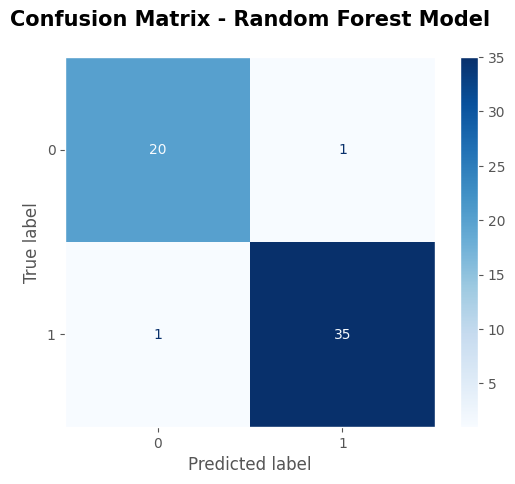

In [35]:
ConfusionMatrixDisplay(confusion_matrix=cm_rf,
                       display_labels=pipe.classes_).plot(cmap='Blues')

plt.title('Confusion Matrix - Random Forest Model\n',
          fontdict={
              'fontsize': 15,
              'fontweight': 'bold'
          })
plt.grid(False)
plt.show()

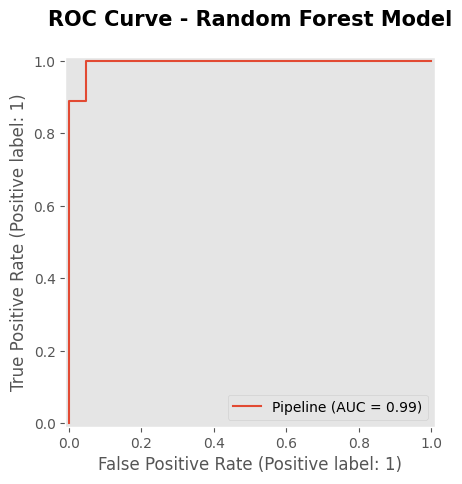

In [36]:
RocCurveDisplay.from_estimator(estimator=pipe,
                               X=X_test, y=y_test)

plt.title('ROC Curve - Random Forest Model\n',
          fontdict={
              'fontsize': 15,
              'fontweight': 'bold'
          })

plt.grid(False)
plt.show()

Run ID: 350f1bb616e4483e9a5b36ef35222af6

	Random Forest Classifier
Accuracy : 0.9649
F1       : 0.9722
Precision: 0.9722
Recall   : 0.9722
ROC AUC  : 0.9947


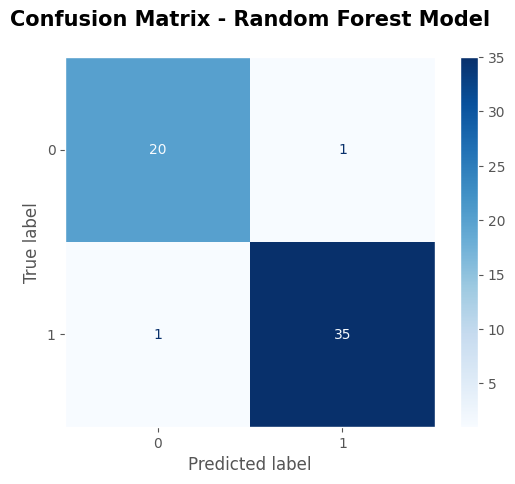

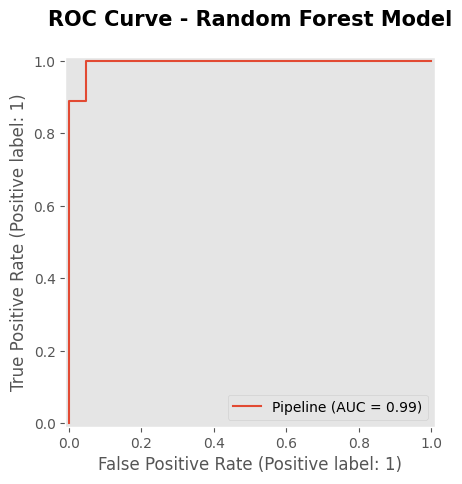

In [37]:
params = {
    'bootstrap': True,
    'class_weight': 'balanced_subsample',
    'criterion': 'log_loss',
    'max_depth': 150,
    'max_features': 'sqrt',
    'n_estimators': 1500,
    'n_jobs': -1,
    'random_state': 42
}

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf_model', RandomForestClassifier(**params))
])

with mlflow.start_run(run_name='rf_experiment') as run:
    pipe.fit(X=X_train, y=y_train)
    y_pred = pipe.predict(X=X_test)

    for k, v in params.items():
        mlflow.log_param(key=k, value=v)

    mlflow.log_metric(key='accuracy',
                      value=accuracy_score(y_true=y_test, y_pred=y_pred))
    mlflow.log_metric(key='f1',
                      value=f1_score(y_true=y_test, y_pred=y_pred))
    mlflow.log_metric(key='precision',
                      value=precision_score(y_true=y_test, y_pred=y_pred))
    mlflow.log_metric(key='recall',
                      value=recall_score(y_true=y_test, y_pred=y_pred))
    mlflow.log_metric(key='roc_auc',
                      value=roc_auc_score(y_true=y_test, y_score=y_pred_proba))

    mlflow.sklearn.log_model(sk_model=pipe, name='model')
    run_id = run.info.run_id
    mlflow.end_run()

    print('Run ID:', run_id)
    print('\n\tRandom Forest Classifier')
    print('=' * 80)
    print(f'Accuracy : {accuracy_score(y_true=y_test, y_pred=y_pred):.4f}')
    print(f'F1       : {f1_score(y_true=y_test, y_pred=y_pred):.4f}')
    print(f'Precision: {precision_score(y_true=y_test, y_pred=y_pred):.4f}')
    print(f'Recall   : {recall_score(y_true=y_test, y_pred=y_pred):.4f}')
    print(f'ROC AUC  : {roc_auc_score(y_true=y_test, y_score=y_pred_proba):.4f}')
    print('=' * 80)
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true=y_test,
                                                             y_pred=y_pred),
                           display_labels=pipe.classes_).plot(cmap='Blues')

    plt.title('Confusion Matrix - Random Forest Model\n',
              fontdict={
                  'fontsize': 15,
                  'fontweight': 'bold'
              })
    plt.grid(False)
    plt.show()
    print('=' * 80)
    RocCurveDisplay.from_estimator(estimator=pipe,
                                   X=X_test, y=y_test)
    plt.title('ROC Curve - Random Forest Model\n',
          fontdict={
              'fontsize': 15,
              'fontweight': 'bold'
          })
    plt.grid(False)
    plt.show()

    print('=' * 80)

In [39]:
 from mlflow.cli import cli

In [43]:
cli(['ui', '--backend-store-uri', './mlruns'])

Registry store URI not provided. Using backend store URI.


[MLflow] Security middleware enabled with default settings (localhost-only). To allow connections from other hosts, use --host 0.0.0.0 and configure --allowed-hosts and --cors-allowed-origins.
2026/02/12 21:41:30 WARNING mlflow.server: MLflow job execution requirements not met (MLflow job backend requires a database backend store URI but got ./mlruns). Server will start without job execution support. Errors will be surfaced at job invocation time.
INFO:     Uvicorn running on http://127.0.0.1:5000 (Press CTRL+C to quit)
INFO:     Started parent process [58408]
2026/02/12 21:41:50 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.schemas
2026/02/12 21:41:50 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.tables
2026/02/12 21:41:50 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.types
2026/02/12 21:41:50 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.constraints
2026/02/12 21:41:50 INFO alembic.runtime.plugins: setup plugin a

SystemExit: 1

/home/fernandogalvao/Documentos/tutorials-2026/venv/lib/python3.13/site-packages/IPython/core/interactiveshell.py:3709: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [44]:
# Set the tracking URI if it's not already set (e.g., if you closed and reopened VSCode or your terminal)
mlflow.set_tracking_uri(uri='./mlruns')

# Get the experiment ID. You can also get it by name.
experiment_name = 'tutorial-mlflow'
experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment:
    print(f"Experiment Name: {experiment.name}")
    print(f"Experiment ID: {experiment.experiment_id}")
    # Search for runs within the experiment
    runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])

    if not runs.empty:
        print(f"Found {len(runs)} runs in experiment '{experiment_name}'.")
        # Display the runs DataFrame
        display(runs)

        # Access data from the latest run (or any specific run by its run_id)
        # Sort by start_time to ensure latest run is first if needed, though iloc[0] works for the first row
        runs_sorted = runs.sort_values('start_time', ascending=False)
        latest_run = runs_sorted.iloc[0]

        print(f"\n--- Details for Run ID: {latest_run.run_id} ---")
        print("Parameters:")
        # Correctly access parameters by filtering Series items
        for k, v in latest_run.items():
            if k.startswith('params.'):
                print(f"  {k.replace('params.', '')}: {v}")

        print("\nMetrics:")
        # Correctly access metrics by filtering Series items
        for k, v in latest_run.items():
            if k.startswith('metrics.'):
                print(f"  {k.replace('metrics.', '')}: {v:.4f}")

        print(f"\nArtifact URI: {latest_run.artifact_uri}")
    else:
        print(f"No runs found for experiment '{experiment_name}'.")
else:
    print(f"Experiment '{experiment_name}' not found.")

Experiment Name: tutorial-mlflow
Experiment ID: 855197431430145080
Found 1 runs in experiment 'tutorial-mlflow'.


,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.f1,metrics.recall,metrics.precision,metrics.accuracy,metrics.roc_auc,params.max_features,params.criterion,params.random_state,params.max_depth,params.n_estimators,params.n_jobs,params.bootstrap,params.class_weight,tags.mlflow.user,tags.mlflow.source.name,tags.mlflow.source.type,tags.mlflow.runName
0,350f1bb616e4483e9a5b36ef35222af6,855197431430145080,FINISHED,/home/fernandogalvao/Documentos/tutorials-2026/mlflow/mlruns/855197431430145080/350f1bb616e4483e...,2026-02-13 00:38:30.156000+00:00,2026-02-13 00:39:24.257000+00:00,0.9722,0.9722,0.9722,0.9649,0.9947,sqrt,log_loss,42,150,1500,-1,True,balanced_subsample,fernandogalvao,1-intro-mflow.ipynb,NOTEBOOK,rf_experiment



--- Details for Run ID: 350f1bb616e4483e9a5b36ef35222af6 ---
Parameters:
  max_features: sqrt
  criterion: log_loss
  random_state: 42
  max_depth: 150
  n_estimators: 1500
  n_jobs: -1
  bootstrap: True
  class_weight: balanced_subsample

Metrics:
  f1: 0.9722
  recall: 0.9722
  precision: 0.9722
  accuracy: 0.9649
  roc_auc: 0.9947

Artifact URI: /home/fernandogalvao/Documentos/tutorials-2026/mlflow/mlruns/855197431430145080/350f1bb616e4483e9a5b36ef35222af6/artifacts


In [45]:
loaded_model = mlflow.sklearn.load_model(model_uri=f'runs:/{run_id}/model')

In [46]:
sample = X_test.iloc[[0]]
sample

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
199,14.4500,20.2200,94.4900,642.7000,0.0987,0.1206,0.1180,0.0598,0.1950,0.0647,0.2092,0.6509,1.4460,19.4200,0.0040,0.0160,0.0200,0.0073,0.0152,0.0020,18.3300,30.1200,117.9000,"1,044.0000",0.1552,0.4056,0.4967,0.1838,0.4753,0.1013


In [47]:
pred = loaded_model.predict(sample)[0]
{'prediction': int(pred)}

{'prediction': 0}

In [48]:
random_sample = X_test.sample(n=1)
random_sample

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
199,14.4500,20.2200,94.4900,642.7000,0.0987,0.1206,0.1180,0.0598,0.1950,0.0647,0.2092,0.6509,1.4460,19.4200,0.0040,0.0160,0.0200,0.0073,0.0152,0.0020,18.3300,30.1200,117.9000,"1,044.0000",0.1552,0.4056,0.4967,0.1838,0.4753,0.1013


In [49]:
random_sample_prediction = loaded_model.predict(random_sample)

if random_sample_prediction[0] == 0:
    print(f'Class: {random_sample_prediction[0]} | The tumor is benign')
else:
    print(f'Class: {random_sample_prediction[0]} | The tumor is malignant')

Class: 0 | The tumor is benign


In [50]:
idx = random_sample.index[0]
idx

np.int64(199)

In [51]:
y_test[y_test.index == idx]

199    0
Name: target, dtype: int64

In [52]:
random_sample = X_test.sample(1)
display(random_sample)

y_pred_sample = loaded_model.predict(X=random_sample)
print('Prediction:', y_pred_sample)

idx = random_sample.index[0]
print(y_test[y_test.index == idx])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
359,9.4360,18.3200,59.8200,278.6000,0.1009,0.0596,0.0271,0.0141,0.1506,0.0696,0.5079,1.2470,3.2670,30.4800,0.0068,0.0090,0.0235,0.0066,0.0194,0.0027,12.0200,25.0200,75.7900,439.6000,0.1333,0.1049,0.1144,0.0505,0.2454,0.0814


Prediction: [1]
359    1
Name: target, dtype: int64


In [53]:
for i in range(21):
    random_sample = X_test.sample(1)
    display(random_sample)
    
    y_pred_sample = loaded_model.predict(X=random_sample)
    print('Prediction:', y_pred_sample)
    
    idx = random_sample.index[0]
    print(y_test[y_test.index == idx])
    print('\n')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
167,16.7800,18.8000,109.3000,886.3000,0.0887,0.0918,0.0842,0.0658,0.1893,0.0553,0.5990,1.3910,4.1290,67.3400,0.0061,0.0247,0.0263,0.0160,0.0209,0.0035,20.0500,26.3000,130.7000,"1,260.0000",0.1168,0.2119,0.2318,0.1474,0.2810,0.0723


Prediction: [0]
167    0
Name: target, dtype: int64




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
433,18.8200,21.9700,123.7000,"1,110.0000",0.1018,0.1389,0.1594,0.0874,0.1943,0.0613,0.8191,1.9310,4.4930,103.9000,0.0081,0.0409,0.0532,0.0183,0.0238,0.0045,22.6600,30.9300,145.3000,"1,603.0000",0.1390,0.3463,0.3912,0.1708,0.3007,0.0831


Prediction: [0]
433    0
Name: target, dtype: int64




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
223,15.7500,20.2500,102.6000,761.3000,0.1025,0.1204,0.1147,0.0646,0.1935,0.0630,0.3473,0.9209,2.2440,32.1900,0.0048,0.0237,0.0238,0.0086,0.0177,0.0031,19.5600,30.2900,125.9000,"1,088.0000",0.1552,0.4480,0.3976,0.1479,0.3993,0.1064


Prediction: [0]
223    0
Name: target, dtype: int64




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
415,11.8900,21.1700,76.3900,433.8000,0.0977,0.0812,0.0255,0.0218,0.2019,0.0629,0.2747,1.2030,1.9300,19.5300,0.0099,0.0305,0.0163,0.0093,0.0226,0.0023,13.0500,27.2100,85.0900,522.9000,0.1426,0.2187,0.1164,0.0826,0.3075,0.0735


Prediction: [1]
415    1
Name: target, dtype: int64




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
359,9.4360,18.3200,59.8200,278.6000,0.1009,0.0596,0.0271,0.0141,0.1506,0.0696,0.5079,1.2470,3.2670,30.4800,0.0068,0.0090,0.0235,0.0066,0.0194,0.0027,12.0200,25.0200,75.7900,439.6000,0.1333,0.1049,0.1144,0.0505,0.2454,0.0814


Prediction: [1]
359    1
Name: target, dtype: int64




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
358,8.8780,15.4900,56.7400,241.0000,0.0829,0.0770,0.0472,0.0238,0.1930,0.0662,0.5381,1.2000,4.2770,30.1800,0.0109,0.0290,0.0321,0.0151,0.0284,0.0042,9.9810,17.7000,65.2700,302.0000,0.1015,0.1248,0.0944,0.0476,0.2434,0.0743


Prediction: [1]
358    1
Name: target, dtype: int64




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
295,13.7700,13.2700,88.0600,582.7000,0.0920,0.0622,0.0106,0.0192,0.1592,0.0591,0.2191,0.6946,1.4790,17.7400,0.0043,0.0082,0.0043,0.0068,0.0215,0.0018,14.6700,16.9300,94.1700,661.1000,0.1170,0.1072,0.0373,0.0580,0.2823,0.0679


Prediction: [1]
295    1
Name: target, dtype: int64




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
1,20.5700,17.7700,132.9000,"1,326.0000",0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,0.5435,0.7339,3.3980,74.0800,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035,24.9900,23.4100,158.8000,"1,956.0000",0.1238,0.1866,0.2416,0.1860,0.2750,0.0890


Prediction: [0]
1    0
Name: target, dtype: int64




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
199,14.4500,20.2200,94.4900,642.7000,0.0987,0.1206,0.1180,0.0598,0.1950,0.0647,0.2092,0.6509,1.4460,19.4200,0.0040,0.0160,0.0200,0.0073,0.0152,0.0020,18.3300,30.1200,117.9000,"1,044.0000",0.1552,0.4056,0.4967,0.1838,0.4753,0.1013


Prediction: [0]
199    0
Name: target, dtype: int64




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
198,19.1800,22.4900,127.5000,"1,148.0000",0.0852,0.1428,0.1114,0.0677,0.1767,0.0553,0.4357,1.0730,3.8330,54.2200,0.0055,0.0370,0.0271,0.0122,0.0141,0.0034,23.3600,32.0600,166.4000,"1,688.0000",0.1322,0.5601,0.3865,0.1708,0.3193,0.0922


Prediction: [0]
198    0
Name: target, dtype: int64




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
488,11.6800,16.1700,75.4900,420.5000,0.1128,0.0926,0.0428,0.0313,0.1853,0.0640,0.3713,1.1540,2.5540,27.5700,0.0090,0.0129,0.0185,0.0117,0.0215,0.0032,13.3200,21.5900,86.5700,549.8000,0.1526,0.1477,0.1490,0.0982,0.2804,0.0802


Prediction: [1]
488    1
Name: target, dtype: int64




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
445,11.9900,24.8900,77.6100,441.3000,0.1030,0.0922,0.0544,0.0427,0.1820,0.0685,0.2623,1.2040,1.8650,19.3900,0.0083,0.0203,0.0233,0.0167,0.0209,0.0037,12.9800,30.3600,84.4800,513.9000,0.1311,0.1822,0.1609,0.1202,0.2599,0.0825


Prediction: [1]
445    1
Name: target, dtype: int64




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
359,9.4360,18.3200,59.8200,278.6000,0.1009,0.0596,0.0271,0.0141,0.1506,0.0696,0.5079,1.2470,3.2670,30.4800,0.0068,0.0090,0.0235,0.0066,0.0194,0.0027,12.0200,25.0200,75.7900,439.6000,0.1333,0.1049,0.1144,0.0505,0.2454,0.0814


Prediction: [1]
359    1
Name: target, dtype: int64




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
237,20.4800,21.4600,132.5000,"1,306.0000",0.0835,0.0835,0.0904,0.0602,0.1467,0.0518,0.6874,1.0410,5.1440,83.5000,0.0080,0.0313,0.0426,0.0167,0.0134,0.0039,24.2200,26.1700,161.7000,"1,750.0000",0.1228,0.2311,0.3158,0.1445,0.2238,0.0713


Prediction: [0]
237    0
Name: target, dtype: int64




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
468,17.6000,23.3300,119.0000,980.5000,0.0929,0.2004,0.2136,0.1002,0.1696,0.0737,0.9289,1.4650,5.8010,104.9000,0.0068,0.0703,0.0659,0.0231,0.0167,0.0113,21.5700,28.8700,143.6000,"1,437.0000",0.1207,0.4785,0.5165,0.1996,0.2301,0.1224


Prediction: [0]
468    0
Name: target, dtype: int64




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
127,19.0000,18.9100,123.4000,"1,138.0000",0.0822,0.0803,0.0927,0.0563,0.1946,0.0504,0.6896,1.3420,5.2160,81.2300,0.0044,0.0273,0.0404,0.0136,0.0203,0.0027,22.3200,25.7300,148.2000,"1,538.0000",0.1021,0.2264,0.3207,0.1218,0.2841,0.0654


Prediction: [0]
127    0
Name: target, dtype: int64




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
292,12.9500,16.0200,83.1400,513.7000,0.1005,0.0794,0.0616,0.0337,0.1730,0.0647,0.2094,0.7636,1.2310,17.6700,0.0087,0.0200,0.0233,0.0113,0.0262,0.0047,13.7400,19.9300,88.8100,585.4000,0.1483,0.2068,0.2241,0.1056,0.3380,0.0958


Prediction: [1]
292    1
Name: target, dtype: int64




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
423,13.6600,19.1300,89.4600,575.3000,0.0906,0.1147,0.0966,0.0481,0.1848,0.0618,0.2244,0.8950,1.8040,19.3600,0.0040,0.0281,0.0367,0.0127,0.0158,0.0040,15.1400,25.5000,101.4000,708.8000,0.1147,0.3167,0.3660,0.1407,0.2744,0.0884


Prediction: [1]
423    1
Name: target, dtype: int64




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
180,27.2200,21.8700,182.1000,"2,250.0000",0.1094,0.1914,0.2871,0.1878,0.1800,0.0577,0.8361,1.4810,5.8200,128.7000,0.0046,0.0254,0.0311,0.0124,0.0158,0.0027,33.1200,32.8500,220.8000,"3,216.0000",0.1472,0.4034,0.5340,0.2688,0.2856,0.0808


Prediction: [0]
180    0
Name: target, dtype: int64




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
198,19.1800,22.4900,127.5000,"1,148.0000",0.0852,0.1428,0.1114,0.0677,0.1767,0.0553,0.4357,1.0730,3.8330,54.2200,0.0055,0.0370,0.0271,0.0122,0.0141,0.0034,23.3600,32.0600,166.4000,"1,688.0000",0.1322,0.5601,0.3865,0.1708,0.3193,0.0922


Prediction: [0]
198    0
Name: target, dtype: int64




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
488,11.6800,16.1700,75.4900,420.5000,0.1128,0.0926,0.0428,0.0313,0.1853,0.0640,0.3713,1.1540,2.5540,27.5700,0.0090,0.0129,0.0185,0.0117,0.0215,0.0032,13.3200,21.5900,86.5700,549.8000,0.1526,0.1477,0.1490,0.0982,0.2804,0.0802


Prediction: [1]
488    1
Name: target, dtype: int64




In [54]:
export_dir = pathlib.Path('./artifacts/export').resolve()
export_dir.mkdir(parents=True, exist_ok=True)

In [55]:
mlflow.sklearn.save_model(sk_model=loaded_model, path=export_dir)

In [56]:
print('Model successfully exported to:', export_dir.resolve())

Model successfully exported to: /home/fernandogalvao/Documentos/tutorials-2026/mlflow/artifacts/export


In [57]:
%whos

Variable                   Type                      Data/Info
--------------------------------------------------------------
ConfusionMatrixDisplay     type                      <class 'sklearn.metrics._<...>.ConfusionMatrixDisplay'>
Pipeline                   ABCMeta                   <class 'sklearn.pipeline.Pipeline'>
RandomForestClassifier     ABCMeta                   <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
RocCurveDisplay            type                      <class 'sklearn.metrics._<...>c_curve.RocCurveDisplay'>
SEED                       int                       42
StandardScaler             type                      <class 'sklearn.preproces<...>ng._data.StandardScaler'>
X                          DataFrame                 Shape: (569, 30)
X_test                     DataFrame                 Shape: (57, 30)
X_train                    DataFrame                 Shape: (512, 30)
accuracy_score             function                  <function accuracy_score at 0x7